In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-coffee-price/coffee.csv


In [2]:
kahve=pd.read_csv('/kaggle/input/daily-coffee-price/coffee.csv')

In [4]:
kahve.head(3)

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.0,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.5,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.0,115.00,118.60,6165,USD


In [5]:
kahve.info()  #date buradaki bilgiye göre nesnedir. dolayısıyla buradaki date kısmı datetime ile çevrilebilir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5746 non-null   object 
 1   Open      5746 non-null   float64
 2   High      5746 non-null   float64
 3   Low       5746 non-null   float64
 4   Close     5746 non-null   float64
 5   Volume    5746 non-null   int64  
 6   Currency  5746 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 314.4+ KB


In [12]:
import matplotlib.pyplot as plt

In [13]:
kahve['Date']=pd.to_datetime(kahve['Date'])

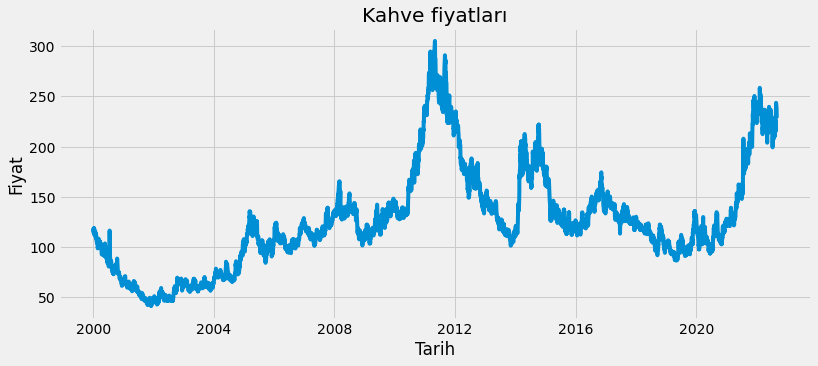

In [14]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,5))
plt.plot((kahve)['Date'],(kahve['Close']))
plt.title('Kahve fiyatları')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.grid(True)
plt.show()


In [27]:
yıl=kahve.groupby(pd.Grouper(key='Date',freq="1Y")).mean()    #gruplanılan yapı indexe düşer. artık bu bilgiye index anahtar kelimesiyle ulaşılabilir.
kahve_max=kahve.groupby(pd.Grouper(key='Date',freq="1Y")).max()
kahve_min=kahve.groupby(pd.Grouper(key='Date',freq="1Y")).min()


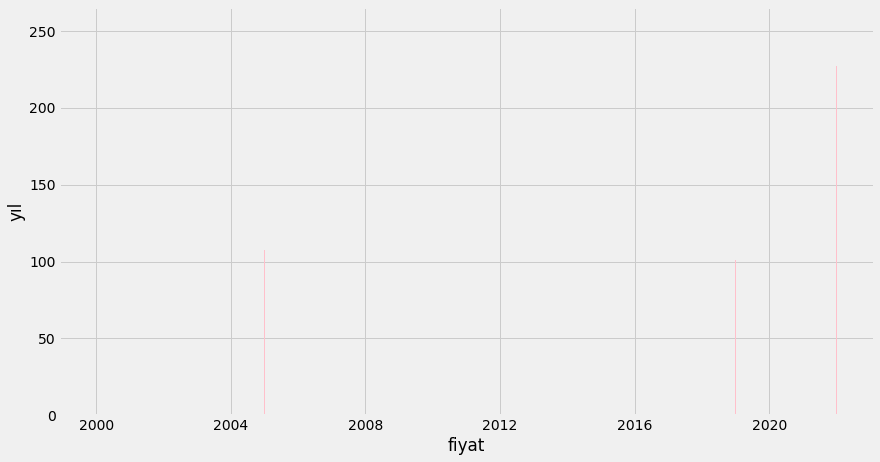

In [20]:
plt.style.use("fivethirtyeight")     #bu şekilde yapıldığında barlar çok ince görünüyor.bunu çözmek için aşağıdaki gibi yazamalıyız.
plt.figure(figsize=(13,7))
plt.bar(yıl.index,yıl['Close'],color="pink")
plt.xlabel("fiyat")
plt.ylabel("yıl")
plt.grid(True)
plt.show()

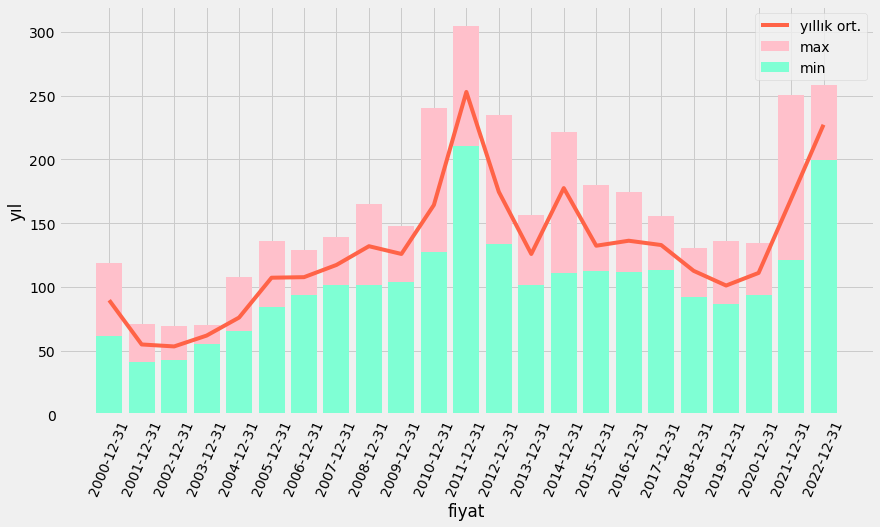

In [39]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(13,7))

plt.bar(yıl.index.astype('string'),kahve_max['Close'], color="pink")
plt.bar(yıl.index.astype('string'),kahve_min['Close'], color="aquamarine")
plt.plot(yıl.index.astype('string'),yıl['Close'],color="tomato")
plt.xticks(rotation=67)

plt.legend(["yıllık ort.","max","min"])
plt.xlabel("fiyat")
plt.ylabel("yıl")
plt.grid(True)
plt.show()